In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

tf.random.set_seed(42)

2.3.0
2.4.0


In [2]:
# load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


(5000, 28, 28) (55000, 28, 28)


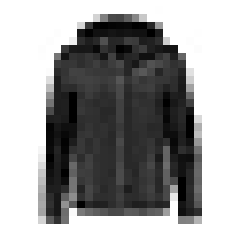

In [3]:
# split it into training and validation sets
# val: 5000, train: 55000
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print(X_valid.shape, X_train.shape)

import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(y_train[0],"indicates", class_names[y_train[0]])

4 indicates Coat


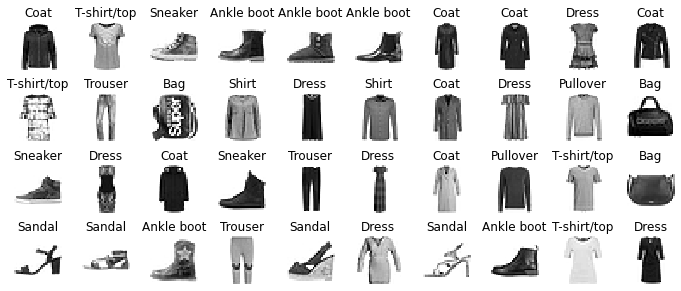

In [5]:
# take a look at a sample of the images in the dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [6]:

# start building a DNN model using sequential Keras API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 23,970
Trainable params: 23,970
Non-trainable params: 0
_________________________________________________________________


In [7]:
# do training
history = model.fit(X_train, y_train, epochs=30, batch_size=16,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
3438/3438 [==============================] - 3s 729us/step - loss: 0.7792 - accuracy: 0.7353 - val_loss: 0.5574 - val_accuracy: 0.8080
Epoch 2/30
3438/3438 [==============================] - 2s 686us/step - loss: 0.5048 - accuracy: 0.8227 - val_loss: 0.4441 - val_accuracy: 0.8512
Epoch 3/30
3438/3438 [==============================] - 2s 632us/step - loss: 0.4565 - accuracy: 0.8394 - val_loss: 0.5493 - val_accuracy: 0.8038
Epoch 4/30
3438/3438 [==============================] - 2s 625us/step - loss: 0.4286 - accuracy: 0.8481 - val_loss: 0.3981 - val_accuracy: 0.8602
Epoch 5/30
3438/3438 [==============================] - 2s 608us/step - loss: 0.4084 - accuracy: 0.8545 - val_loss: 0.3804 - val_accuracy: 0.8690
Epoch 6/30
3438/3438 [==============================] - 2s 593us/step - loss: 0.3908 - accuracy: 0.8614 - val_loss: 0.3893 - val_accuracy: 0.8680
Epoch 7/30
3438/3438 [==============================] - 2s 592us/step - loss: 0.3790 - accuracy: 0.8653 - val_loss: 0.3697 -

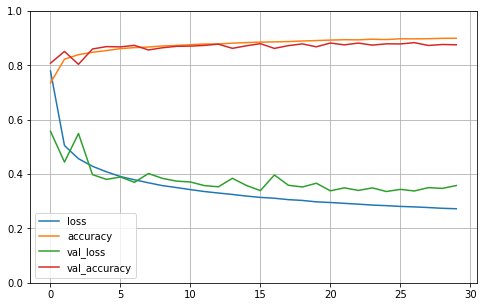

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().sEet_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 515us/step - loss: 0.3859 - accuracy: 0.8682


[0.3859180212020874, 0.8682000041007996]

In [10]:
# Using the model to make predictions
import numpy as np

X_new = X_test[:5]
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]  # predicted class


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [11]:
y_new = y_test[:5]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

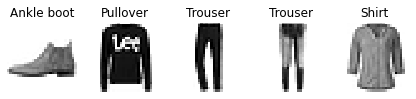

In [12]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, len(X_new), index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()